In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
 # Check for missing values
print(df.isnull().sum())

# Convert Gender column to numerical values
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Preview data after encoding
df.head()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


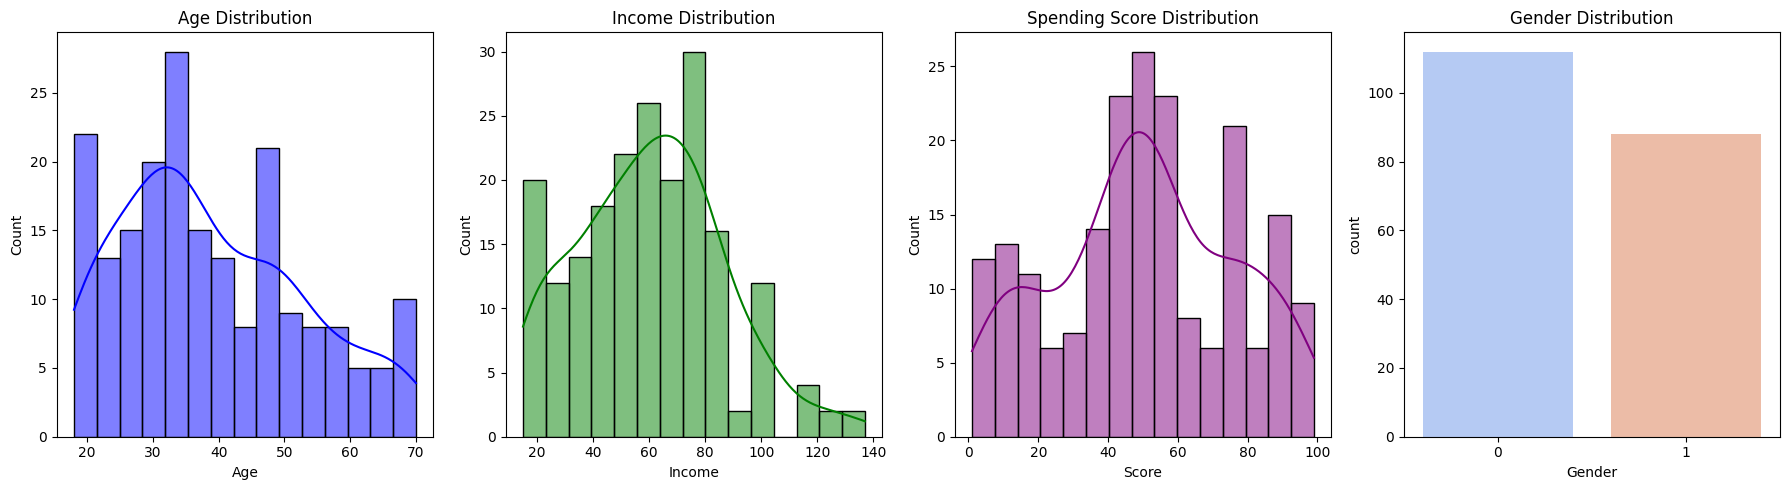

In [6]:
# Distribution of Age, Income, Score, and Gender
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 4, 2)
sns.histplot(df['Income'], bins=15, kde=True, color='green')
plt.title('Income Distribution')

plt.subplot(1, 4, 3)
sns.histplot(df['Score'], bins=15, kde=True, color='purple')
plt.title('Spending Score Distribution')

plt.subplot(1, 4, 4)
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


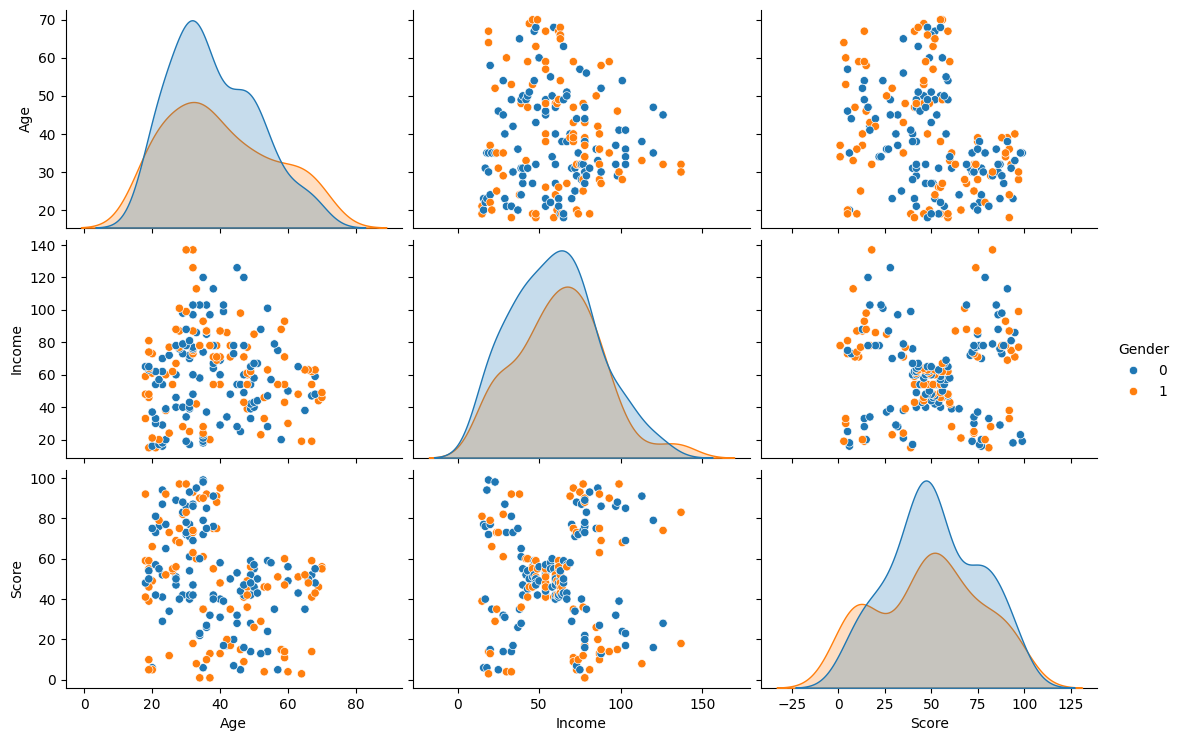

In [7]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()


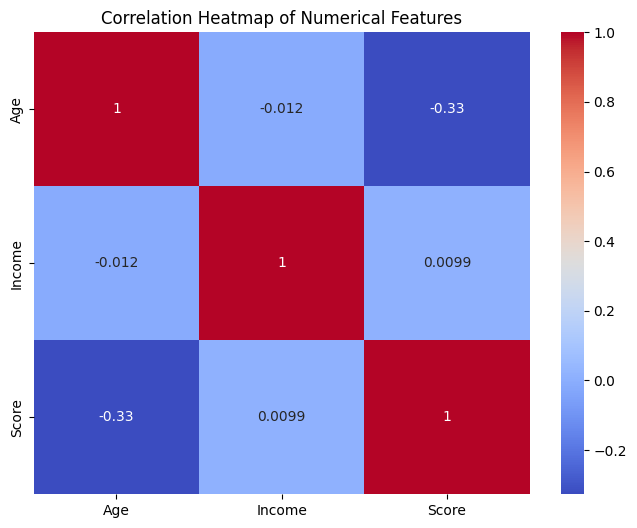

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Income', 'Score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

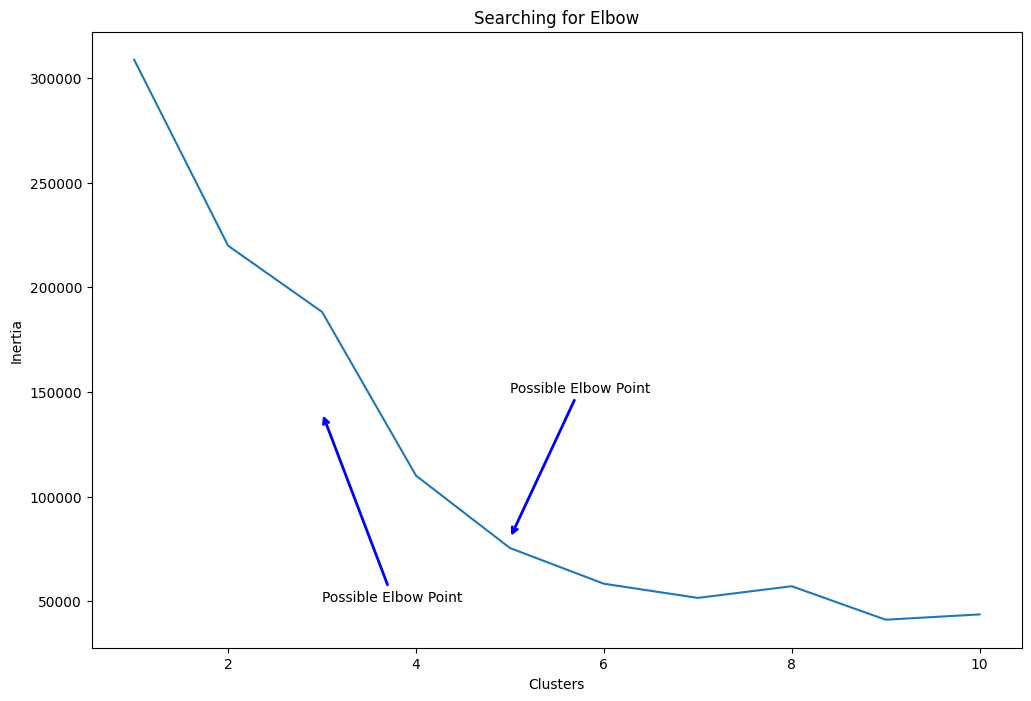

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

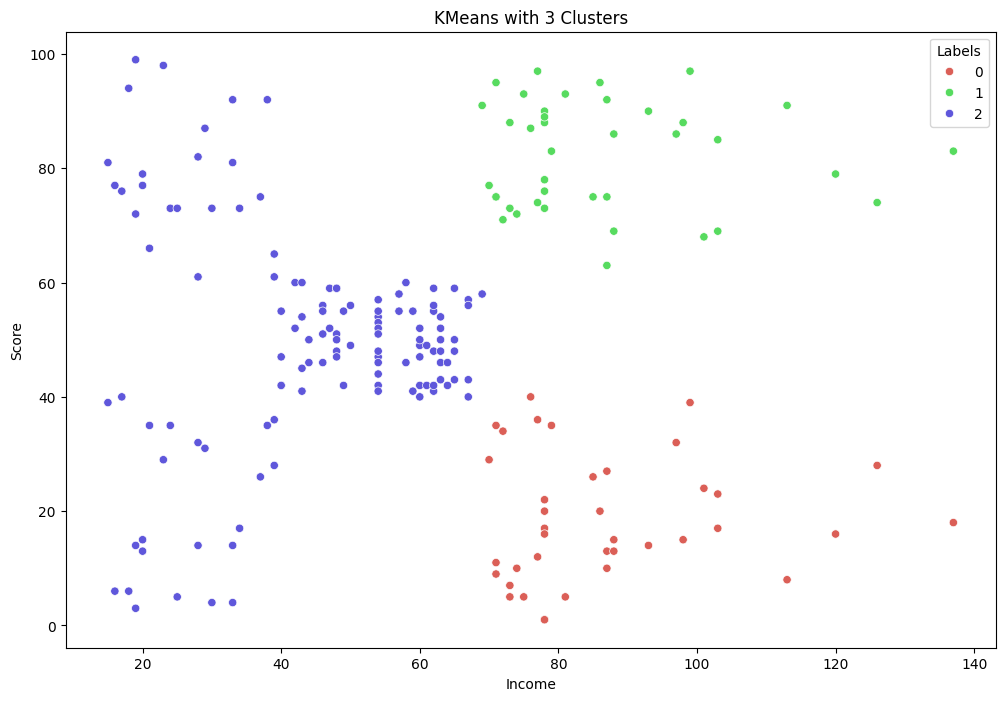

In [ ]:
# Assuming 'Income' and 'Score' are columns in your DataFrame X
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))

# Pass columns as keyword arguments to sns.scatterplot()
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X,
                palette=sns.color_palette('hls', 3))

plt.title('KMeans with 3 Clusters')
plt.show()


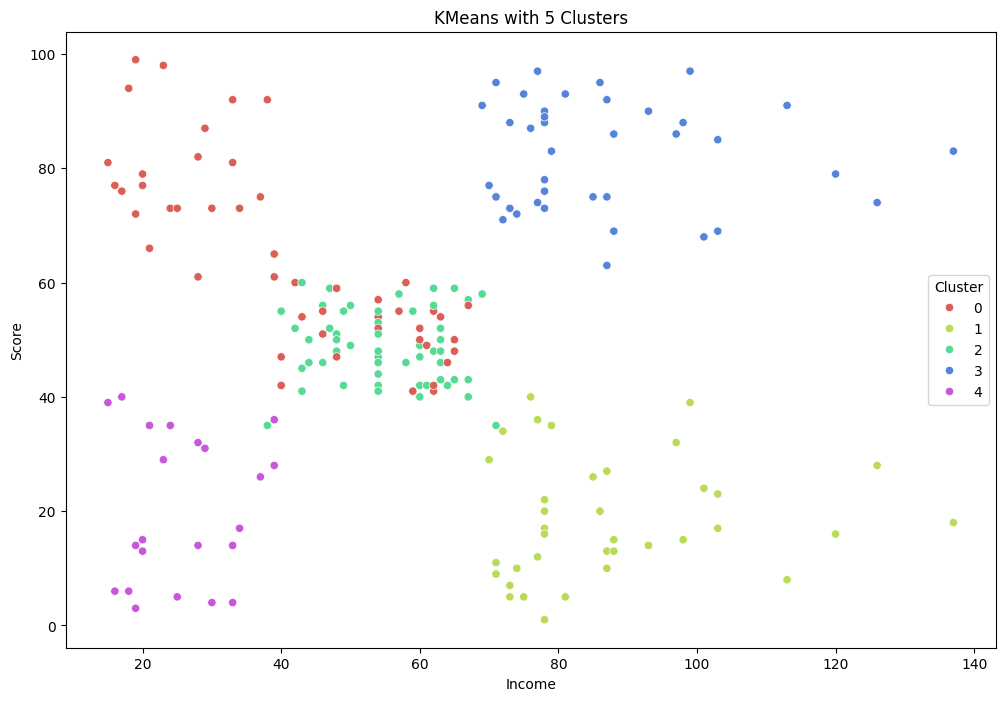

In [ ]:
# Perform KMeans clustering with 5 clusters
km5 = KMeans(n_clusters=5).fit(X)

# Add cluster labels to the DataFrame
X['Labels'] = km5.labels_

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X,
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.show()


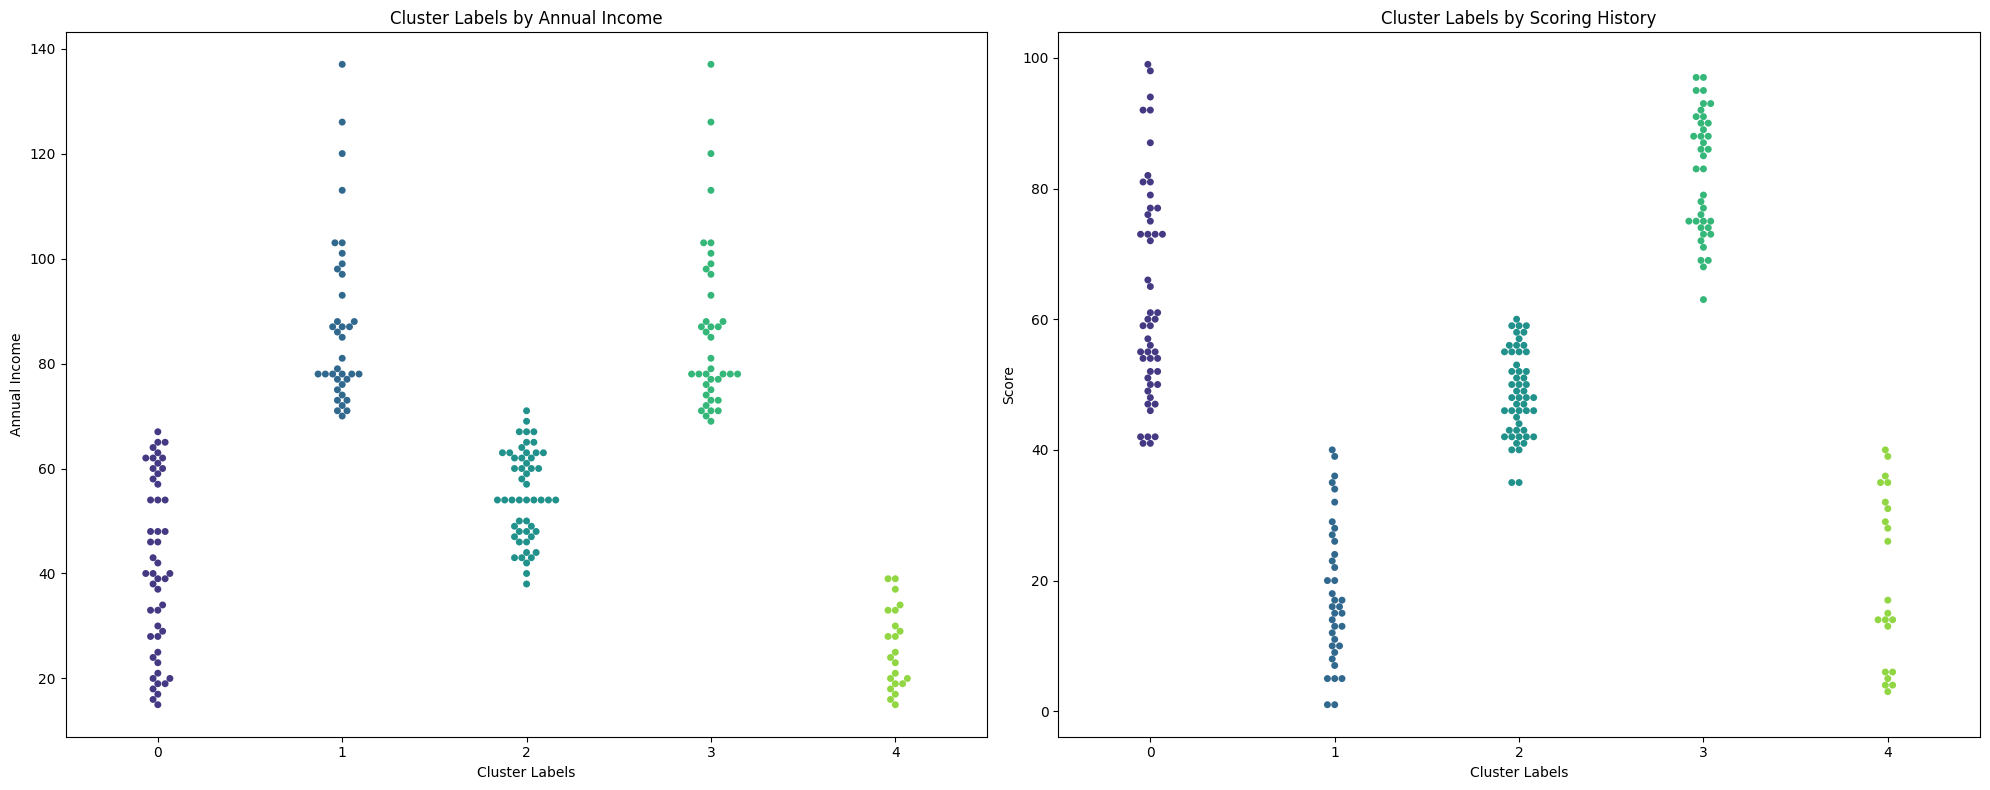

In [ ]:
# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Swarm plot for Annual Income by Labels
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax1, palette='viridis')
ax1.set_title('Cluster Labels by Annual Income')
ax1.set_xlabel('Cluster Labels')
ax1.set_ylabel('Annual Income')

# Swarm plot for Scoring History by Labels
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax2, palette='viridis')
ax2.set_title('Cluster Labels by Scoring History')
ax2.set_xlabel('Cluster Labels')
ax2.set_ylabel('Score')

# Display the plots
plt.tight_layout()
plt.show()


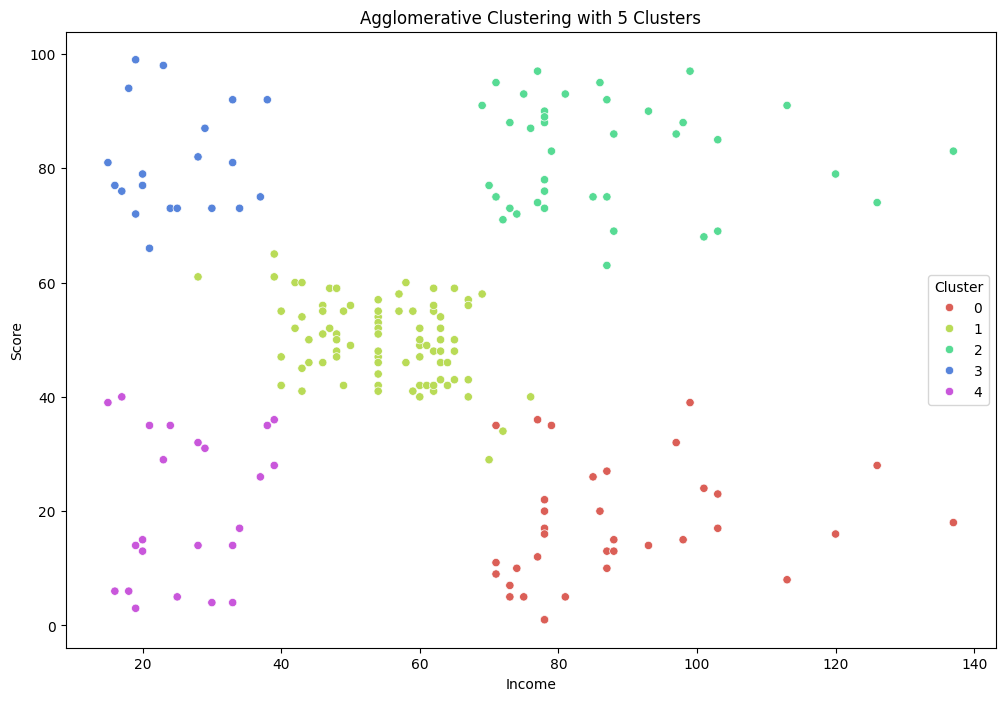

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering with 5 clusters
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

# Add the labels to the DataFrame
X['Labels'] = agglom.labels_

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X,
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.show()


In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)


[[  0.          42.05948169  33.03028913 ... 117.12813496 124.53915047
  130.17296186]
 [ 42.05948169   0.          75.01999733 ... 111.76761606 137.77880824
  122.35195135]
 [ 33.03028913  75.01999733   0.         ... 129.89226305 122.24974438
  143.78456106]
 ...
 [117.12813496 111.76761606 129.89226305 ...   0.          57.10516614
   14.35270009]
 [124.53915047 137.77880824 122.24974438 ...  57.10516614   0.
   65.06150936]
 [130.17296186 122.35195135 143.78456106 ...  14.35270009  65.06150936
    0.        ]]


In [ ]:
Z = hierarchy.linkage(dist, 'complete')


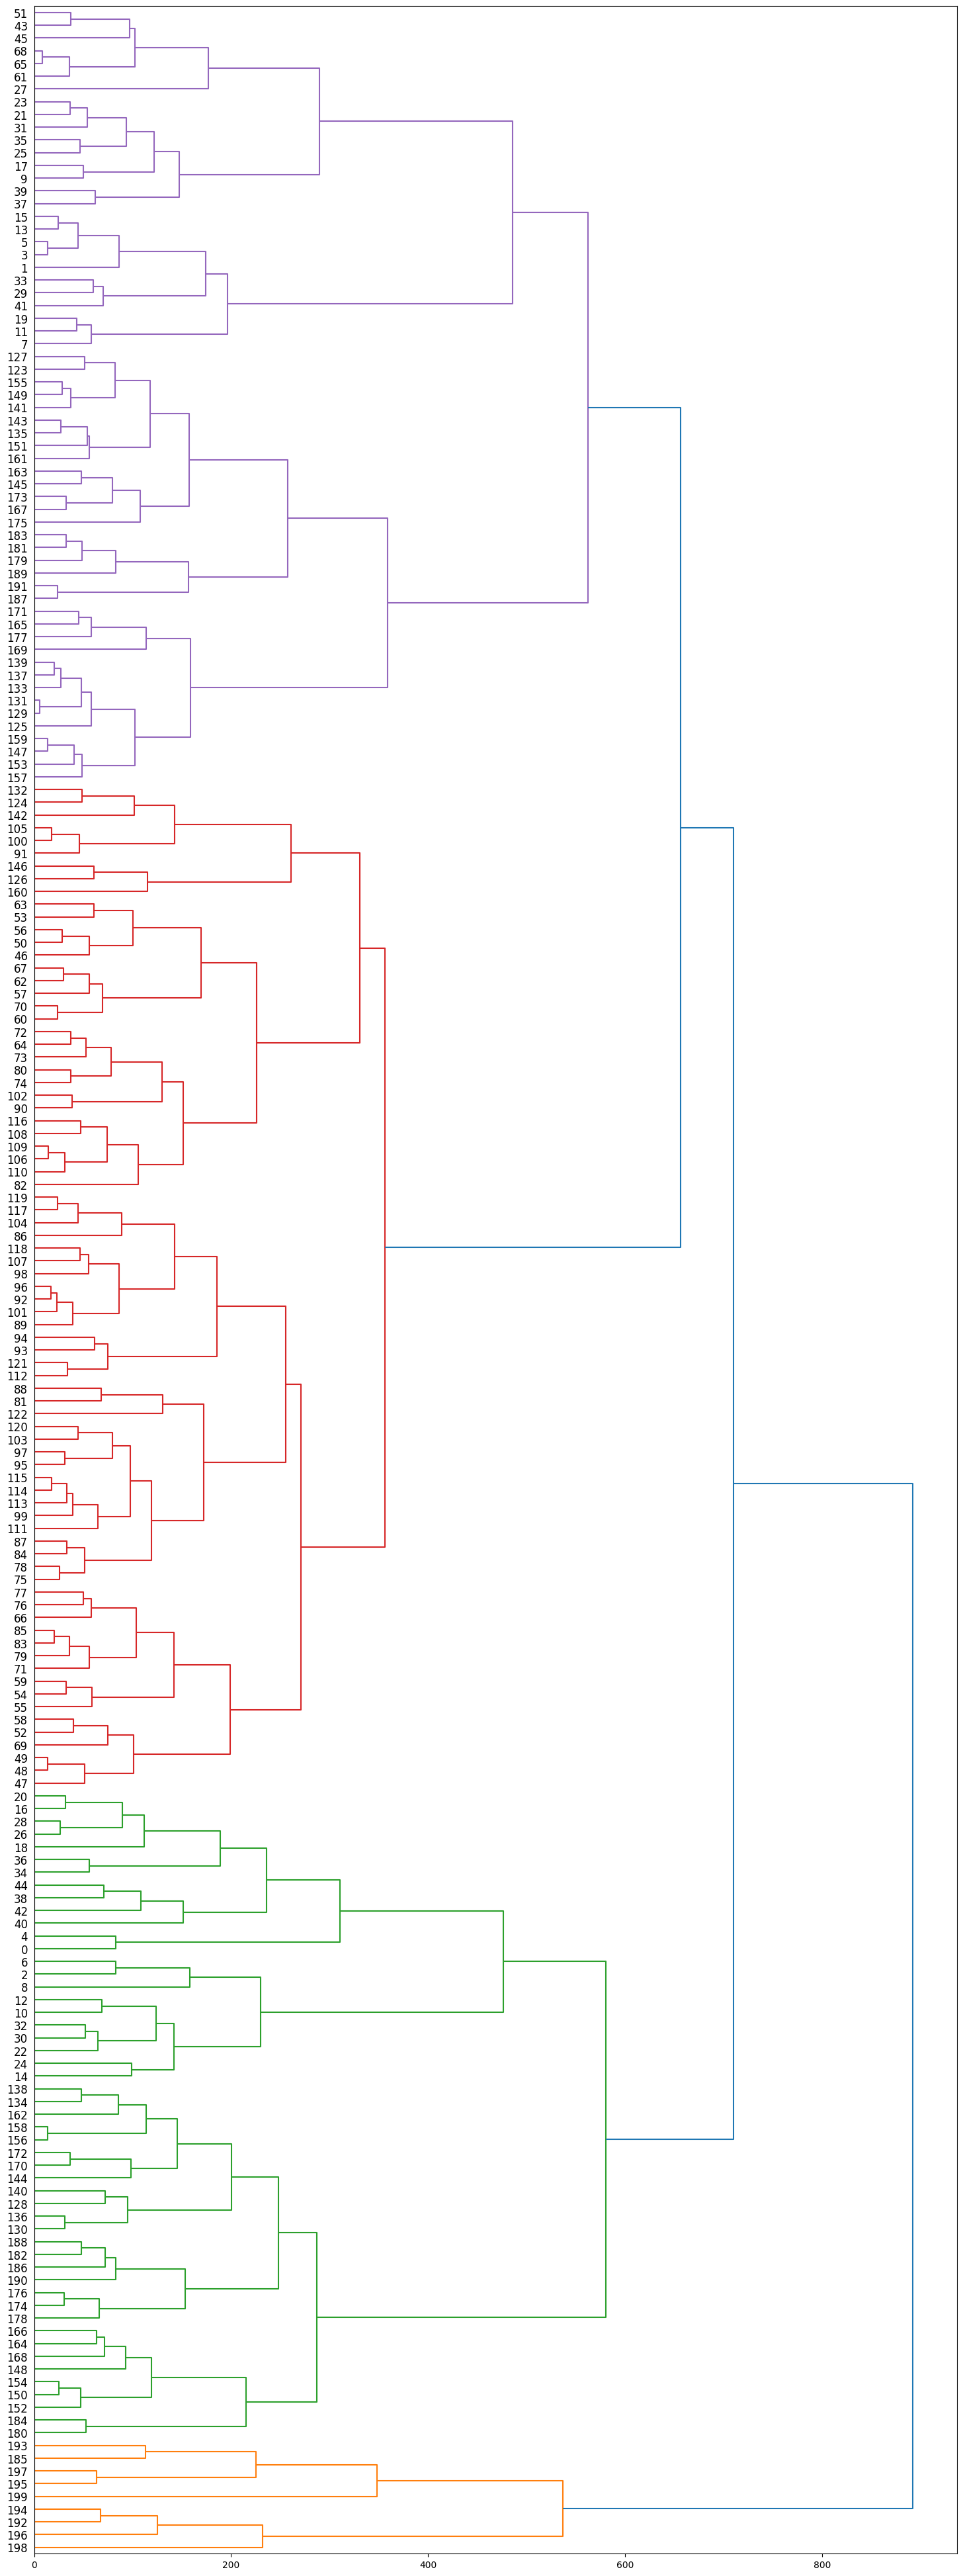

In [ ]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')


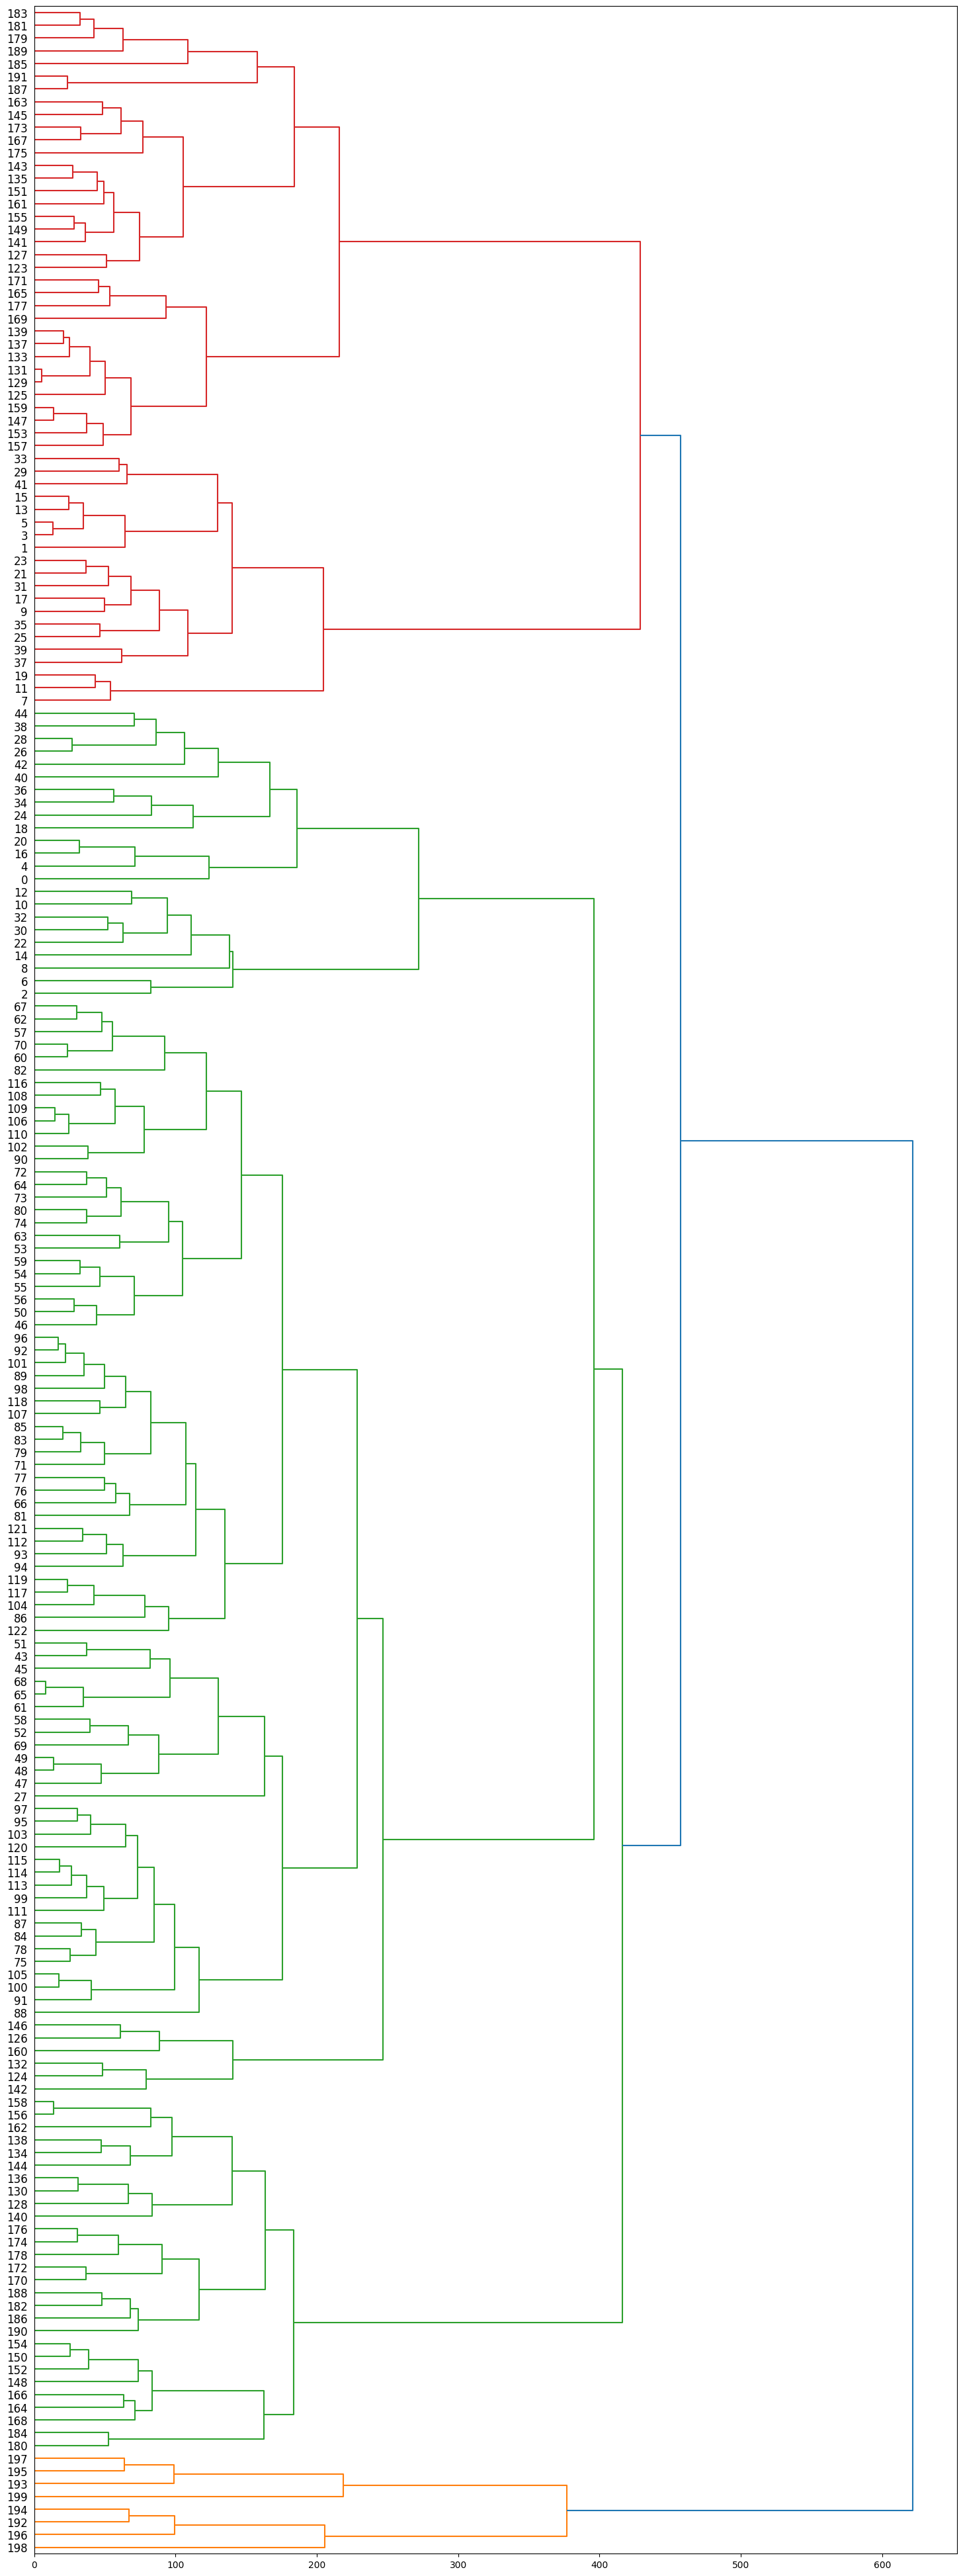

In [ ]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

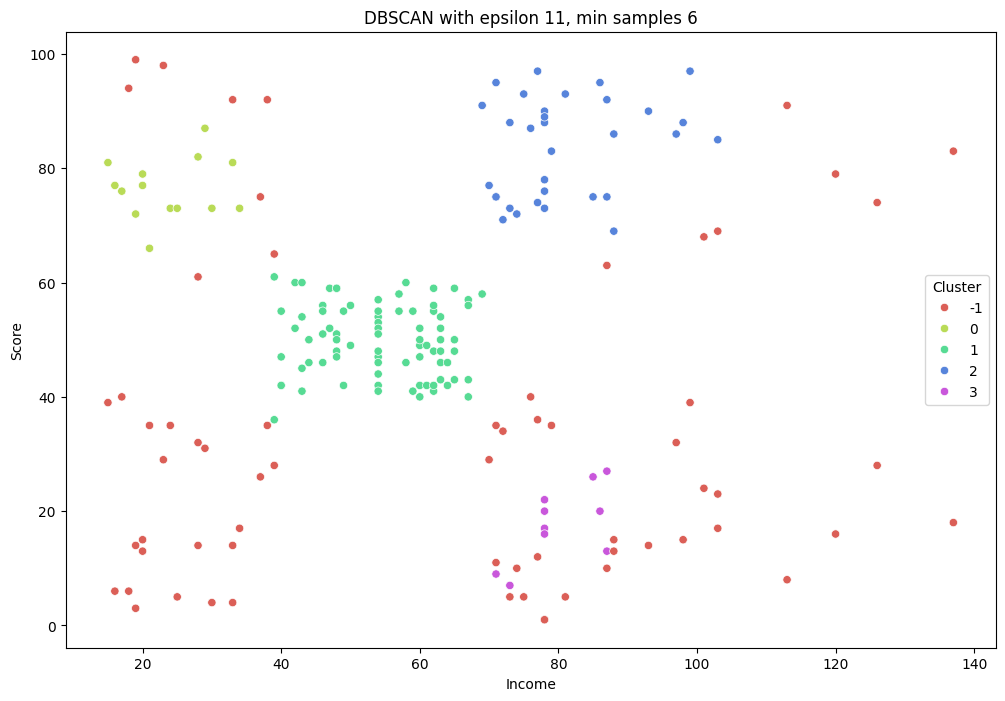

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Perform DBSCAN clustering
db = DBSCAN(eps=11, min_samples=6).fit(X)

# Add the cluster labels to the DataFrame
X['Labels'] = db.labels_

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X,
                palette=sns.color_palette('hls', len(np.unique(db.labels_))))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.show()


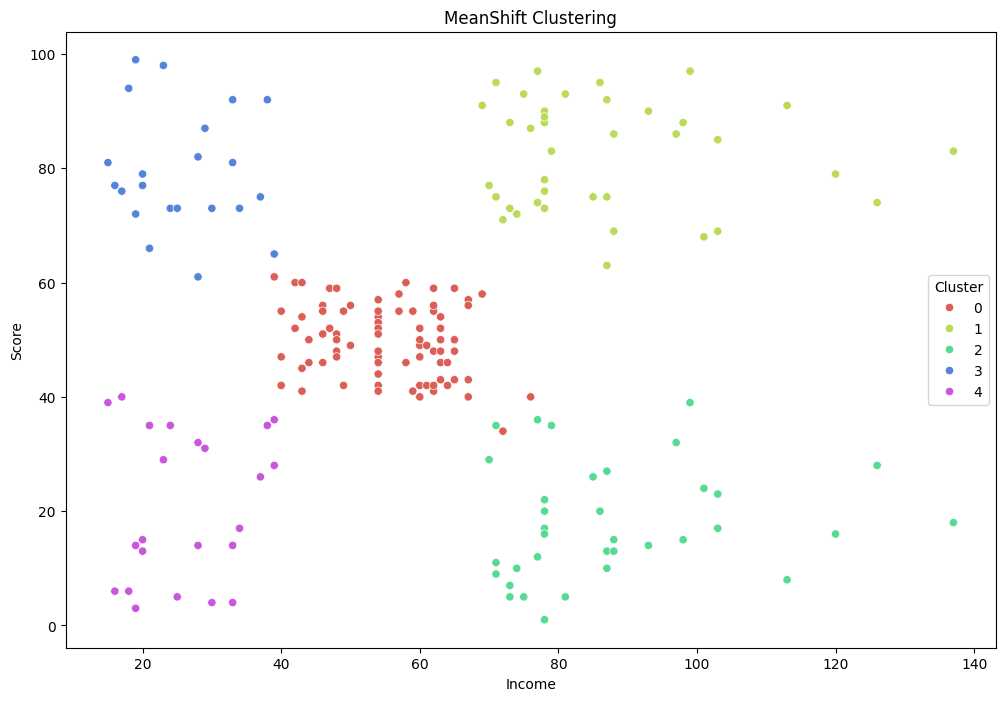

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# Estimate the bandwidth based on the data
bandwidth = estimate_bandwidth(X, quantile=0.1)

# Initialize MeanShift with the estimated bandwidth
ms = MeanShift(bandwidth=bandwidth).fit(X)

# Add the labels to the DataFrame
X['Labels'] = ms.labels_

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Score', hue='Labels', data=X,
                palette=sns.color_palette('hls', len(np.unique(ms.labels_))))
plt.title('MeanShift Clustering')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.show()


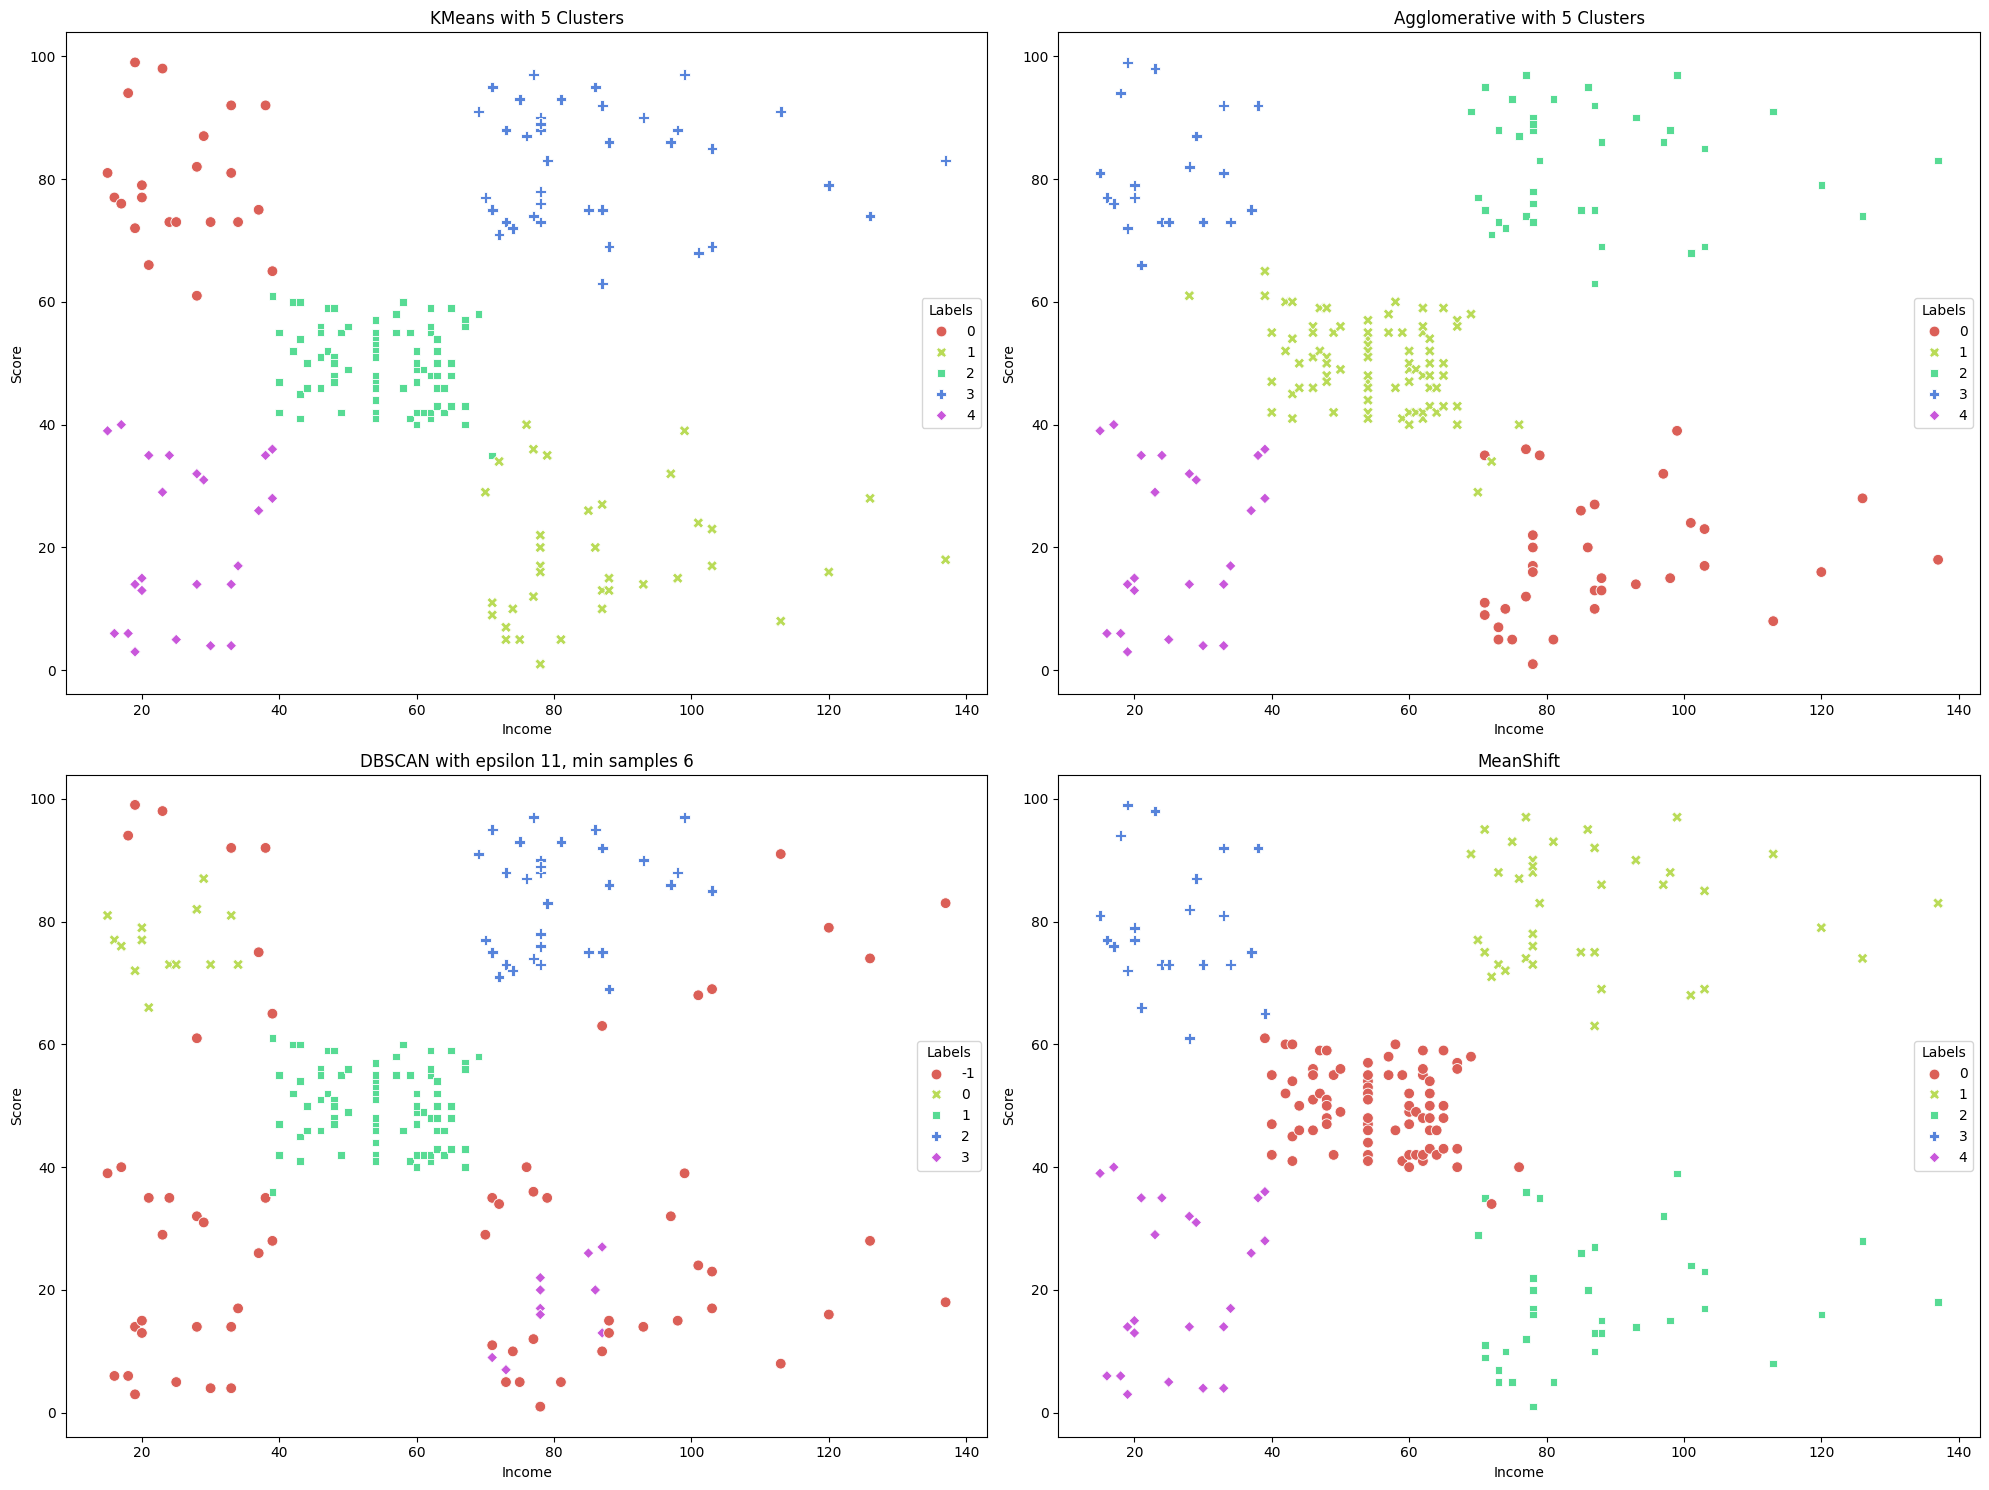

In [ ]:
fig = plt.figure(figsize=(20, 15))

##### KMeans #####
ax = fig.add_subplot(221)
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(x='Income', y='Score', hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 5), s=60, data=X, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(x='Income', y='Score', hue='Labels', style='Labels',
                palette=sns.color_palette('hls', 5), s=60, data=X, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)
db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x='Income', y='Score', hue='Labels', style='Labels', s=60,
                palette=sns.color_palette('hls', len(np.unique(db.labels_))), data=X, ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MeanShift #####
ax = fig.add_subplot(224)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(x='Income', y='Score', hue='Labels', style='Labels', s=60,
                palette=sns.color_palette('hls', len(np.unique(ms.labels_))), data=X, ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()


In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Initialize models and store results
models = {
    'K-Means': KMeans(n_clusters=5, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=5),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Cross-validate and compute silhouette scores
scores = {}
for name, model in models.items():
    labels = model.fit_predict(X_scaled)
    if len(set(labels)) > 1:  # Ensure more than one cluster exists
        score = silhouette_score(X_scaled, labels)
    else:
        score = None  # Not valid if only one cluster
    scores[name] = score

# Display silhouette scores
print("Silhouette Scores for each model:", scores)


Silhouette Scores for each model: {'K-Means': 0.28733914723855114, 'Agglomerative': 0.30454552617046354, 'DBSCAN': -0.128701372094438}


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of clusters to evaluate
cluster_range = range(2, 10)
best_score = -1
best_n_clusters = None

# Iterate over different cluster counts
for n_clusters in cluster_range:
    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X_scaled)

    # Calculate silhouette score if there are more than 1 cluster
    score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else None
    if score is not None and score > best_score:
        best_score = score
        best_n_clusters = n_clusters

print("Optimal number of clusters for Agglomerative Clustering:", best_n_clusters)
print("Best silhouette score:", best_score)


Optimal number of clusters for Agglomerative Clustering: 9
Best silhouette score: 0.38702934481726414


Cluster Summary Table:
            Age        Annual Income (k$)        Spending Score (1-100)       
          mean    std               mean    std                   mean    std
Cluster                                                                      
0        32.60   3.94              79.63   8.41                  81.00   9.82
1        39.82  16.25              62.73   5.84                  48.02   7.64
2        33.00   3.12             109.56  15.27                  85.89   6.79
3        25.33   5.38              25.10   7.13                  80.05  10.25
4        40.44   7.32             111.00  13.94                  22.78   9.34
5        41.22  12.33              80.96   7.27                  12.78   7.17
6        41.36  12.27              28.18   8.96                  33.27   4.47
7        46.11  16.11              46.39   4.70                  50.64   6.57
8        48.75  13.59              24.58   6.69                   9.58   5.28


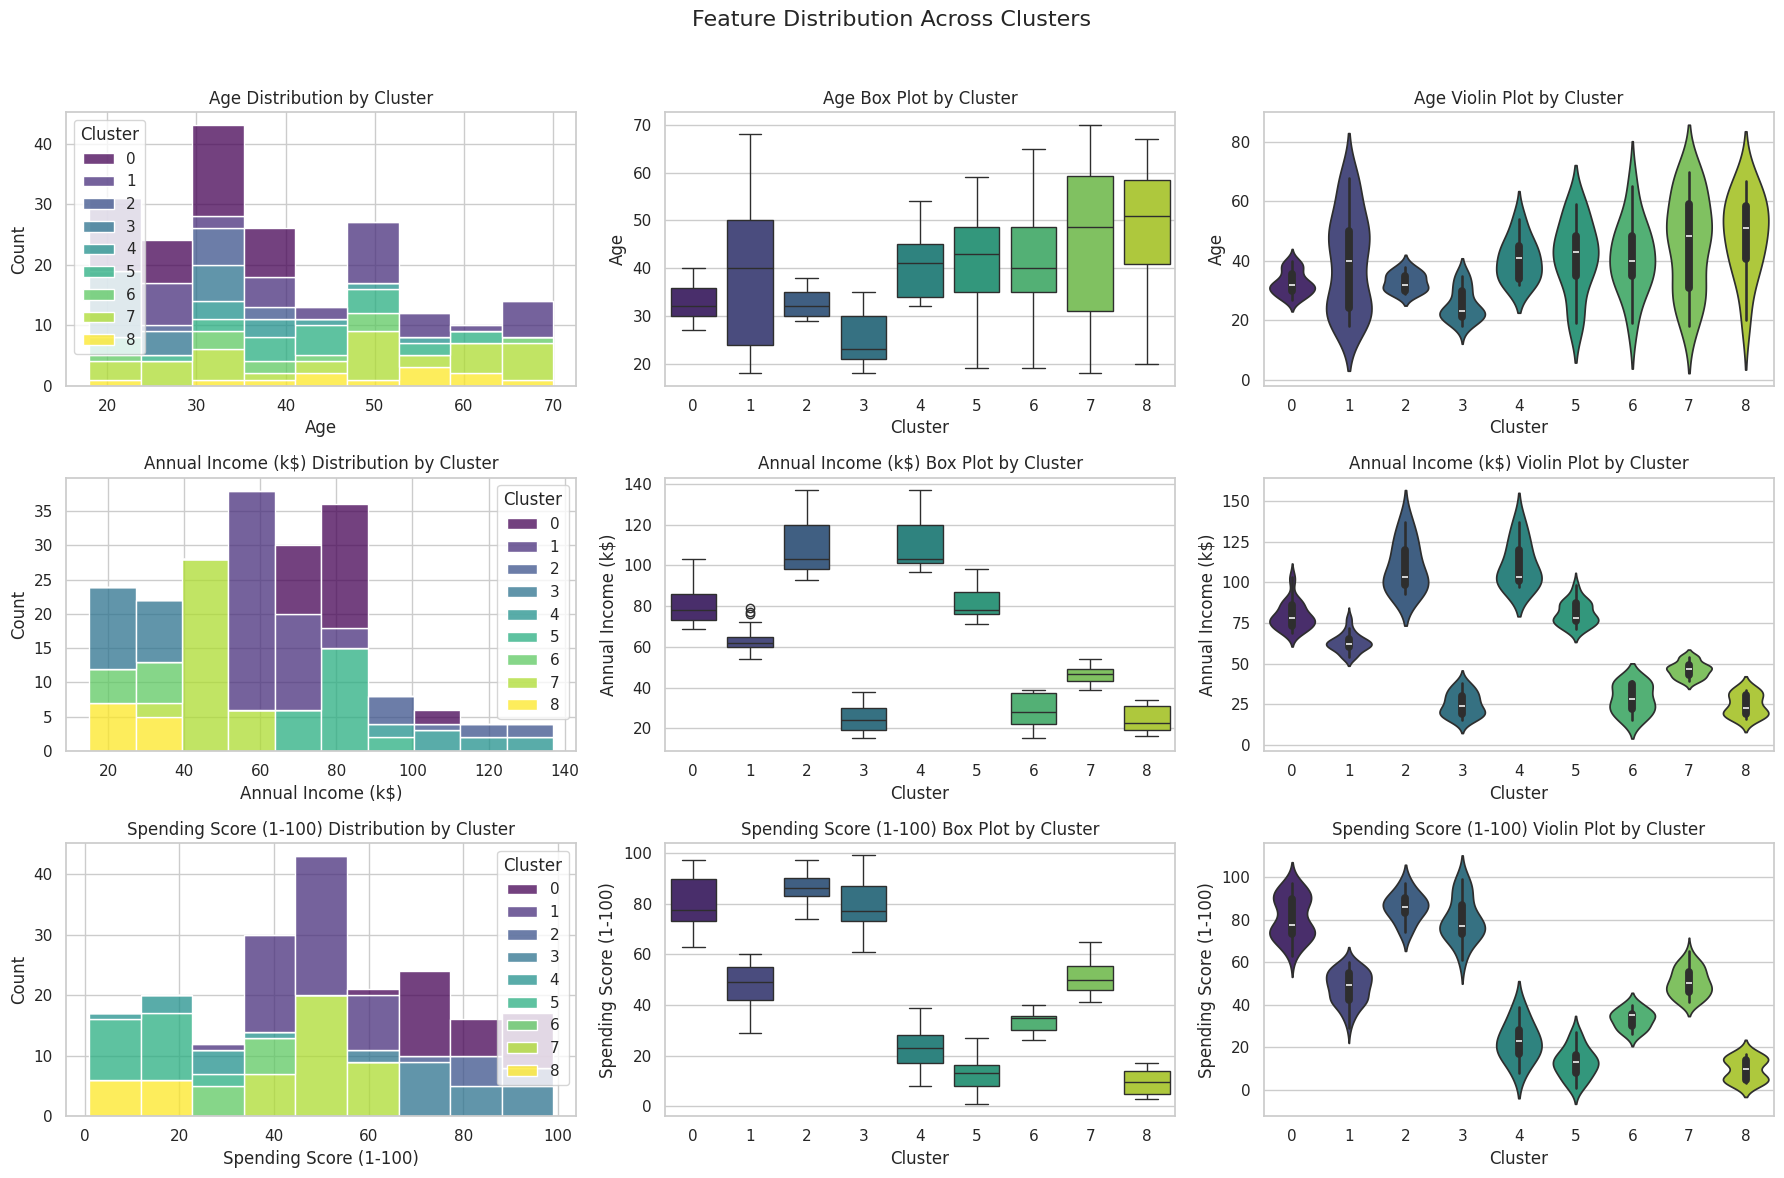

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)

# Select relevant features and scale them
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Agglomerative Clustering with 9 clusters
best_n_clusters = 9
best_agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
best_labels = best_agglomerative.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
clustered_df = df.copy()
clustered_df['Cluster'] = best_labels

# Descriptive statistics of each feature by cluster
cluster_summary = clustered_df.groupby('Cluster').agg(
    {
        'Age': ['mean', 'std'],
        'Annual Income (k$)': ['mean', 'std'],
        'Spending Score (1-100)': ['mean', 'std']
    }
).round(2)
print("Cluster Summary Table:\n", cluster_summary)

# Set up for visualization
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Feature Distribution Across Clusters", fontsize=16)

# Plot histograms for each feature by cluster
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i, feature in enumerate(features):
    sns.histplot(data=clustered_df, x=feature, hue='Cluster', multiple="stack", palette='viridis', ax=axes[i, 0])
    axes[i, 0].set_title(f'{feature} Distribution by Cluster')

    sns.boxplot(data=clustered_df, x='Cluster', y=feature, palette='viridis', ax=axes[i, 1])
    axes[i, 1].set_title(f'{feature} Box Plot by Cluster')

    sns.violinplot(data=clustered_df, x='Cluster', y=feature, palette='viridis', ax=axes[i, 2])
    axes[i, 2].set_title(f'{feature} Violin Plot by Cluster')

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# Define cluster descriptions
cluster_descriptions = {
    "Young High Spenders": "High Spending, Moderate to High Income, Younger Age",
    "Middle Spenders": "Moderate Spending, Moderate Income, Mixed Ages",
    "Affluent Big Spenders": "Very High Income, High Spending",
    "Young Low Income High Spenders": "Low Income, High Spending, Younger Age",
    "Affluent Low Spenders": "High Income, Low Spending, Older Age",
    "Cost-Conscious Middle Income": "Moderate Income, Low Spending, Mixed Ages",
    "Elderly Low Spenders": "Low Income, Low Spending, Older Age",
    "Older Balanced Spenders": "Moderate Income, Moderate Spending, Older Age",
    "Elderly Minimal Spenders": "Very Low Income, Very Low Spending, Older Age"
}

# Print descriptions with "no" for each cluster
for i, (name, description) in enumerate(cluster_descriptions.items()):
    print(f"{i}: {name}: {description}")


0: Young High Spenders: High Spending, Moderate to High Income, Younger Age
1: Middle Spenders: Moderate Spending, Moderate Income, Mixed Ages
2: Affluent Big Spenders: Very High Income, High Spending
3: Young Low Income High Spenders: Low Income, High Spending, Younger Age
4: Affluent Low Spenders: High Income, Low Spending, Older Age
5: Cost-Conscious Middle Income: Moderate Income, Low Spending, Mixed Ages
6: Elderly Low Spenders: Low Income, Low Spending, Older Age
7: Older Balanced Spenders: Moderate Income, Moderate Spending, Older Age
8: Elderly Minimal Spenders: Very Low Income, Very Low Spending, Older Age
